# Managing Time Series Data With `Pandas``



In [1]:
import pandas as pd

In [6]:
# We pass  a date time into our csv file we want to read
temp = pd.read_csv('temp.csv', parse_dates = ["datetime"], index_col= 'datetime')

In [7]:
temp

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


In [9]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [10]:
# Another way to do this
temp = pd.read_csv('temp.csv')

In [12]:
temp.set_index(pd.to_datetime(temp.datetime),inplace =True)

In [16]:
temp.drop(columns="datetime", inplace=True)

In [18]:
temp

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


#  `pd.to_datetime()`


In [20]:
pd.to_datetime("2015-05-20 10:30:20")

Timestamp('2015-05-20 10:30:20')

In [21]:
pd.to_datetime("20150520")

Timestamp('2015-05-20 00:00:00')

In [22]:
pd.to_datetime("2015/05/20")

Timestamp('2015-05-20 00:00:00')

In [23]:
pd.to_datetime("2015 05 20")

Timestamp('2015-05-20 00:00:00')

In [24]:
pd.to_datetime("2015 May 20 ")

Timestamp('2015-05-20 00:00:00')

In [27]:
pd.to_datetime(["20150520" , "2015 May 04" "2015 05 30", "Elephant"], errors="coerce")

DatetimeIndex(['2015-05-20', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

# Initial Analysis / Visual Inspection of Time Series

In [28]:
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [29]:
import matplotlib.pyplot as plt

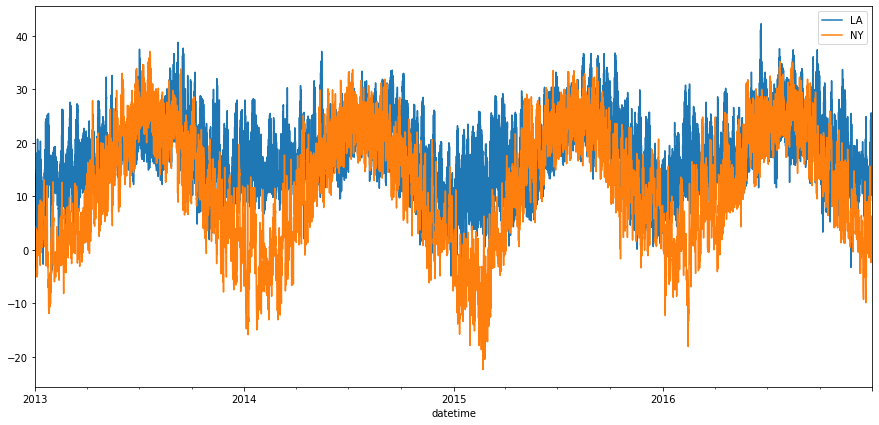

In [32]:
temp.plot(figsize=(15,7))
plt.show()

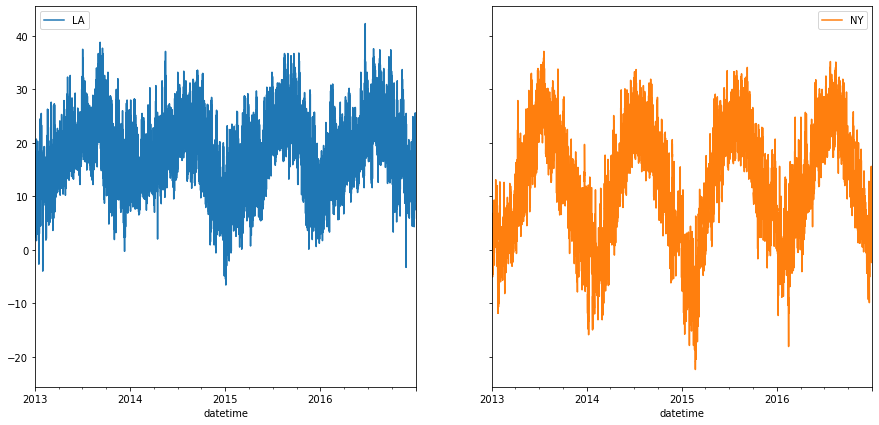

In [40]:
temp.plot(figsize=(15,7), subplots=True, layout=(1,2),sharey=True)
plt.show()

# Indexing and slicing with Time Series

In [38]:
temp.loc[["2014-04-20 19:00:00"]]

,LA,NY
datetime,,
2014-04-20 19:00:00,22.4,12.9


In [42]:
temp.loc["2015"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [43]:
temp.loc["2015-05"]

,LA,NY
datetime,,
2015-05-01 00:00:00,25.5,13.9
2015-05-01 01:00:00,25.7,13.9
2015-05-01 02:00:00,23.8,10.5
2015-05-01 03:00:00,22.0,10.2
2015-05-01 04:00:00,20.1,8.6
...,...,...
2015-05-31 19:00:00,25.4,25.5
2015-05-31 20:00:00,26.0,23.9
2015-05-31 21:00:00,24.9,22.5


In [44]:
temp.loc["2015-05-20"]

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0
2015-05-20 04:00:00,13.3,19.7
2015-05-20 05:00:00,11.3,17.1
2015-05-20 06:00:00,11.4,17.1
2015-05-20 07:00:00,8.8,16.6
2015-05-20 08:00:00,8.2,12.5


In [45]:
# Another syntax to specify ranges

#Ranges are included on both start and stop in time series
temp.loc["2015-01-01": "2015-12-31"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [46]:
temp.loc["20FEBRUARY2015"]

,LA,NY
datetime,,
2015-02-20 00:00:00,16.4,-12.4
2015-02-20 01:00:00,17.5,-12.4
2015-02-20 02:00:00,14.6,-14.5
2015-02-20 03:00:00,13.9,-14.5
2015-02-20 04:00:00,10.3,-14.5
2015-02-20 05:00:00,8.9,-15.9
2015-02-20 06:00:00,9.0,-15.9
2015-02-20 07:00:00,7.1,-15.9
2015-02-20 08:00:00,6.6,-16.8


# Creating Customized dates with `pd.date_range()`

#### The below give the same result but diffrent approach


In [47]:
pd.date_range(start= "2015-07-01", end = "2015-07-31", freq="D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range(start= "2015-07-01",periods =31, freq="D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range(periods =31, end = "2015-07-31", freq="D") # D stands for for Day

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range(start= "2015-07-01", end = "2015-07-31", freq="B") # B stands for the bussiness day

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-20', '2015-07-21', '2015-07-22',
               '2015-07-23', '2015-07-24', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='B')

In [53]:
pd.date_range(start= "2015-07-01", periods = 10, freq="H") # H stands for Hourly

DatetimeIndex(['2015-07-01 00:00:00', '2015-07-01 01:00:00',
               '2015-07-01 02:00:00', '2015-07-01 03:00:00',
               '2015-07-01 04:00:00', '2015-07-01 05:00:00',
               '2015-07-01 06:00:00', '2015-07-01 07:00:00',
               '2015-07-01 08:00:00', '2015-07-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [54]:
pd.date_range(start= "2015-07-01", periods = 10, freq="W") # H stands for Hourly

DatetimeIndex(['2015-07-05', '2015-07-12', '2015-07-19', '2015-07-26',
               '2015-08-02', '2015-08-09', '2015-08-16', '2015-08-23',
               '2015-08-30', '2015-09-06'],
              dtype='datetime64[ns]', freq='W-SUN')

In [55]:
pd.date_range(start= "2015-07-01", periods = 10, freq="W-Mon") # H stands for Hourly and the Mon specify the day you want the week to work

DatetimeIndex(['2015-07-06', '2015-07-13', '2015-07-20', '2015-07-27',
               '2015-08-03', '2015-08-10', '2015-08-17', '2015-08-24',
               '2015-08-31', '2015-09-07'],
              dtype='datetime64[ns]', freq='W-MON')

In [56]:
pd.date_range(start= "2015-07-01", periods = 10, freq="M") # M stands for Month

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30'],
              dtype='datetime64[ns]', freq='M')

In [58]:
pd.date_range(start= "2015-07-01", periods = 10, freq="MS") # MS is the start of the week

DatetimeIndex(['2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01'],
              dtype='datetime64[ns]', freq='MS')

In [60]:
pd.date_range(start= "2015-01-25", periods = 10, freq=pd.DateOffset(month=1))

DatetimeIndex(['2015-01-25'], dtype='datetime64[ns]', freq='<DateOffset: month=1>')

In [61]:
pd.date_range(start= "2015-07-01", periods = 10, freq="Q") # Q stands for quaurters

DatetimeIndex(['2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30',
               '2016-09-30', '2016-12-31', '2017-03-31', '2017-06-30',
               '2017-09-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [63]:
pd.date_range(start= "2015-07-01", periods = 10, freq="Q-May") # Q_May to change the start of quaurter

DatetimeIndex(['2015-08-31', '2015-11-30', '2016-02-29', '2016-05-31',
               '2016-08-31', '2016-11-30', '2017-02-28', '2017-05-31',
               '2017-08-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='Q-MAY')

In [64]:
pd.date_range(start= "2015-07-01", periods = 10, freq="Y") # Y stands for Yearly

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [65]:
pd.date_range(start= "2015-07-01", periods = 10, freq="YS") # 

DatetimeIndex(['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01',
               '2024-01-01', '2025-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [66]:
pd.date_range(start= "2015-07-01", periods = 10, freq="AS-Apr") 

DatetimeIndex(['2016-04-01', '2017-04-01', '2018-04-01', '2019-04-01',
               '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-01',
               '2024-04-01', '2025-04-01'],
              dtype='datetime64[ns]', freq='AS-APR')

In [68]:
#Going ODDLY Specific
pd.date_range(start= "2015-07-01", periods = 10, freq="3D8H") # This is 3 day 8 hours

DatetimeIndex(['2015-07-01 00:00:00', '2015-07-04 08:00:00',
               '2015-07-07 16:00:00', '2015-07-11 00:00:00',
               '2015-07-14 08:00:00', '2015-07-17 16:00:00',
               '2015-07-21 00:00:00', '2015-07-24 08:00:00',
               '2015-07-27 16:00:00', '2015-07-31 00:00:00'],
              dtype='datetime64[ns]', freq='80H')

# Downsampling Time Series with `resample()`

#### This is used to make your visualization less noizy


In [71]:
#Downsampling from hours to day with mean as agg-func
temp.resample("D").mean()

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667
...,...,...
2016-12-27,12.154167,10.579167
2016-12-28,14.433333,4.016667
2016-12-29,16.045833,1.312500


In [70]:
temp.resample("D").mean().round(1)

,LA,NY
datetime,,
2013-01-01,8.9,-0.4
2013-01-02,9.3,3.2
2013-01-03,10.3,-2.4
2013-01-04,11.5,-2.1
2013-01-05,11.1,0.8
...,...,...
2016-12-27,12.2,10.6
2016-12-28,14.4,4.0
2016-12-29,16.0,1.3


In [72]:
temp.resample("2H").last()

,LA,NY
datetime,,
2013-01-01 00:00:00,10.7,-1.7
2013-01-01 02:00:00,9.3,-2.1
2013-01-01 04:00:00,8.7,-2.5
2013-01-01 06:00:00,7.8,-3.4
2013-01-01 08:00:00,6.6,-1.8
...,...,...
2016-12-31 14:00:00,13.0,-0.6
2016-12-31 16:00:00,12.9,1.9
2016-12-31 18:00:00,13.5,4.6


In [73]:
temp.resample("2H").first()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 08:00:00,6.7,-3.0
...,...,...
2016-12-31 14:00:00,12.7,-1.3
2016-12-31 16:00:00,12.6,1.1
2016-12-31 18:00:00,13.2,3.4


In [74]:
# Timedelta with days on months to start

temp.resample("MS",loffset="25D").mean()

/var/folders/sv/7gkbz2nn0cj0qcsy3nlcp3bm0000gn/T/ipykernel_9143/2385271660.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  temp.resample("MS",loffset="25D").mean()


,LA,NY
datetime,,
2013-01-26,11.596237,1.129570
2013-02-26,12.587202,0.617857
2013-03-26,15.069946,3.719220
2013-04-26,16.487361,10.699306
2013-05-26,19.005780,15.824328
2013-06-26,19.905417,22.225694
2013-07-26,22.093952,26.329704
2013-08-26,21.513172,22.480376
2013-09-26,22.404861,18.291806


In [76]:

 temp.resample("A").mean()

,LA,NY
datetime,,
2013-12-31,17.174229,12.196153
2014-12-31,17.245616,11.370959
2015-12-31,17.191530,11.795194
2016-12-31,18.330305,12.908470


In [77]:
temp.resample("M", kind="timestamp").mean()

,LA,NY
datetime,,
2013-01-31,11.596237,1.129570
2013-02-28,12.587202,0.617857
2013-03-31,15.069946,3.719220
2013-04-30,16.487361,10.699306
2013-05-31,19.005780,15.824328
2013-06-30,19.905417,22.225694
2013-07-31,22.093952,26.329704
2013-08-31,21.513172,22.480376
2013-09-30,22.404861,18.291806


In [78]:
temp.resample("M", kind="period").mean()

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [79]:
#ON WEEKLY BASIS
temp.resample("W", kind="timestamp").mean()

,LA,NY
datetime,,
2013-01-06,10.214583,0.222917
2013-01-13,10.494048,4.245238
2013-01-20,11.119643,3.924405
2013-01-27,15.586905,-4.660714
2013-02-03,11.569643,1.502381
...,...,...
2016-12-04,12.975595,8.024405
2016-12-11,13.738095,1.922619
2016-12-18,13.466667,0.052381


In [80]:
#ON QUARTER BASIS
temp.resample("Q", kind="timestamp").mean()

,LA,NY
datetime,,
2013-03-31,13.099212,1.862361
2013-06-30,18.472115,16.245101
2013-09-30,21.999638,22.411594
2013-12-31,15.047781,8.084918
2014-03-31,15.508287,-0.570880
2014-06-30,18.891255,16.253938
2014-09-30,22.281295,21.738315
2014-12-31,12.281748,7.855933
2015-03-31,11.869306,-3.340509


In [81]:

temp_m = temp.resample("M", kind="timestamp").mean()

In [82]:
temp_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-01-31 to 2016-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      48 non-null     float64
 1   NY      48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


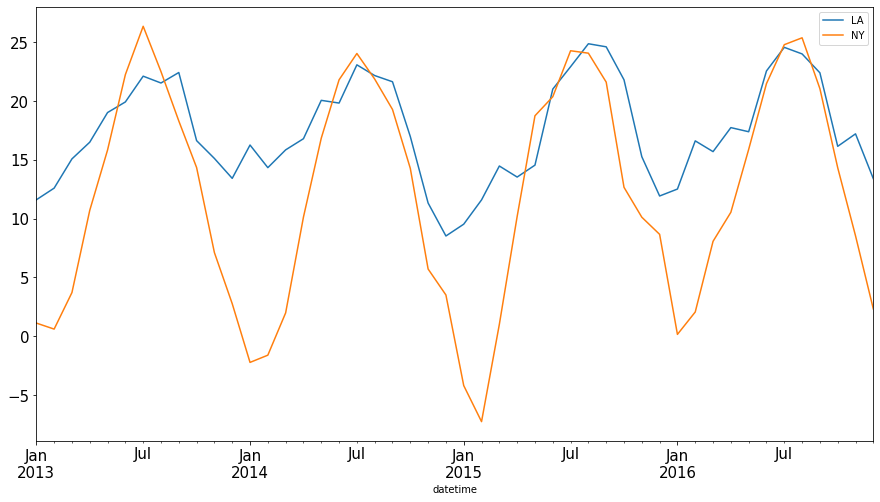

In [84]:
temp_m.plot(figsize=(15,8), fontsize=15)
plt.show()

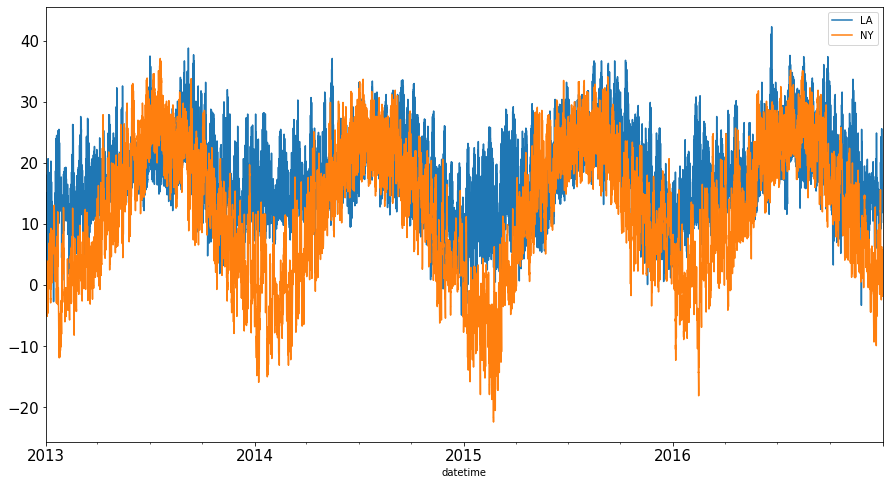

In [85]:
temp.plot(figsize=(15,8), fontsize=15)
plt.show()

# Advanced Indexing with `reindex()`

In [86]:

temp.loc["2015-01-01": "2015-12-31"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [119]:

xmas= pd.date_range(start="2013-12-24", end="2016-12-24", freq=pd.DateOffset(months = 12))

In [122]:
xmas

DatetimeIndex(['2013-12-24', '2014-12-24', '2015-12-24', '2016-12-24'], dtype='datetime64[ns]', freq='<DateOffset: months=12>')

In [123]:
temp.loc[xmas]

,LA,NY
datetime,,
2013-12-24,20.2,9.7
2014-12-24,15.7,7.4
2015-12-24,15.9,13.5
2016-12-24,15.1,4.2
